# **Trabalhando com Planilhas do EXCEL**

In [4]:
import pandas as pd


In [5]:
# Leitura dos arquivos 
df1 = pd.read_excel('/content/drive/MyDrive/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/datasets/Salvador.xlsx')

In [6]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [6]:
#Concatena, ajunta, agrupa todos os arquivos juntos
df = pd.concat([df1, df2, df3, df4, df5])

In [12]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
46,Recife,2019-01-01,239.17,981,8
92,Recife,2019-01-01,163.02,981,4
19,Fortaleza,2019-01-01,18.86,1002,3
0,Recife,2019-01-01,162.61,981,1
128,Salvador,2019-03-02,36.84,1034,1


In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [19]:
# Alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [20]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## **TRATANDO VALORES FALTANTES**

In [22]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [25]:
df['Vendas'].fillna(df["Vendas"].mean, inplace=True)

In [27]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [29]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
128,Natal,2019-01-02,36.84,1034,1
104,Salvador,2019-01-01,188.79,1036,3
38,Salvador,2019-01-01,165.34,1034,3
106,Recife,2019-01-01,30.46,982,3
111,Natal,2019-01-02,147.35,1037,2
168,Natal,2019-01-02,20.22,1036,1
6,Salvador,2019-01-01,36.30,1034,2
121,Natal,2019-01-02,100.70,1037,3
58,Recife,2019-01-01,8.02,983,2
75,Recife,2019-01-01,170.29,981,8


In [30]:
#Subistitui os campos vazios por zero
df["Vendas"].fillna(0, inplace=True)

In [32]:
#Apagando as linhas vazias
df.dropna(inplace=True)

In [34]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [36]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True) 

### **Criando colunas novas**

In [59]:
#Criando a coluna receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [40]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [41]:
# Retornando a maior receita
df['Receita'].max()

3544.0

In [43]:
#Retornando a menor receita
df['Receita'].min()

3.34

In [45]:
#nlargest = retorna os tops X com base na columa tal
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [47]:
#nsmallest = retorna as X piores receitas na columa tal
df.nsmallest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [49]:
# Retorna a receita agrupada por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [51]:
#Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


### **Trabalhando com datas***

In [54]:
#Transformando a coluna de dara em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [56]:
#Verificando o tipo de dado de ada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [58]:
# Transformando coluna de data em Data
df['Data'] = pd.to_datetime(df['Data'])

In [60]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [62]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [67]:
#Criando uma nova coluna com ano
df['Novo Ano'] = df['Data'].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Novo Ano
187,Salvador,2019-01-02,3.85,1035,3,11.55,2019
59,Aracaju,2018-01-01,15.07,1523,7,105.49,2018
209,Natal,2019-01-02,69.98,1034,2,139.96,2019
120,Recife,2019-03-02,184.90,982,4,739.60,2019
224,Natal,2019-01-02,178.30,1035,3,534.90,2019


In [88]:
#Extraindo o mês e o dia da venda
df['mes_venda'], df['dia_venda'] = (df["Data"].dt.month, df['Data'].dt.day)
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,diferenca_dias,Trimestre,Receita,mes_venda,dia_venda
5,Fortaleza,2019-01-01,37.30,1002,5,365 days,1,186.50,1,1
46,Recife,2019-01-01,239.17,981,8,365 days,1,1913.36,1,1
6,Aracaju,2018-01-01,35.50,1522,2,0 days,1,71.00,1,1
132,Recife,2019-03-02,17.49,983,5,425 days,1,87.45,3,2
66,Salvador,2019-01-01,70.20,1035,3,365 days,1,210.60,1,1
21,Recife,2019-01-01,164.74,983,1,365 days,1,164.74,1,1
171,Natal,2019-01-02,136.45,1035,3,366 days,1,409.35,1,2
148,Natal,2019-01-02,40.59,1037,3,366 days,1,121.77,1,2
108,Natal,2019-01-02,11.72,1037,1,366 days,1,11.72,1,2
103,Fortaleza,2019-01-01,142.57,1002,3,365 days,1,427.71,1,1


In [7]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [8]:
#Calculando a diferela de dias
df['diferenca_dias'] = df["Data"] - df['Data'].min()

In [12]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,diferenca_dias
107,Natal,2019-01-02,14.70,1035,1,366 days
55,Natal,2019-01-08,859.00,854,4,372 days
233,Natal,2019-01-03,172.40,1036,2,367 days
16,Aracaju,2018-01-01,37.68,1522,10,0 days
109,Aracaju,2018-01-01,51.64,1523,5,0 days


In [14]:
#Criando coluna pra retornar o trimestre
df['Trimestre'] = df['Data'].dt.quarter

In [32]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,diferenca_dias,Trimestre
109,Natal,2019-01-02,124.37,1035,1,366 days,1
10,Natal,2018-10-27,828.00,852,4,299 days,4
183,Salvador,2019-01-02,120.23,1037,2,366 days,1
180,Natal,2019-01-02,116.63,1035,2,366 days,1
105,Salvador,2019-01-01,32.83,1037,1,365 days,1
183,Natal,2019-01-02,120.23,1037,2,366 days,1
163,Natal,2019-01-02,17.66,1036,3,366 days,1
13,Recife,2019-02-12,15.33,983,5,407 days,1
41,Fortaleza,2019-02-13,191.29,1002,3,408 days,1
11,Aracaju,2019-01-01,161.53,1520,4,365 days,1


In [35]:
#Filtrando as vendas de 2019 do mês de Março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [42]:
vendas_marco_19
df['Data'].count()

894

## **Visualização de dados**

In [48]:
#Verifica quantas linhas a gente tem com a loja takl número (LOJA xxx Quant. de Linhas)
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

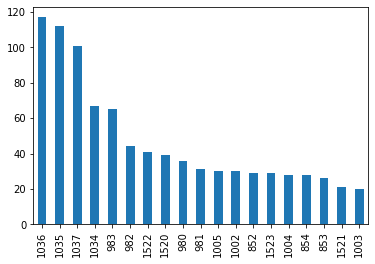

In [50]:
#Gráfico com barras verticais
df['LojaID'].value_counts(ascending=False).plot.bar()

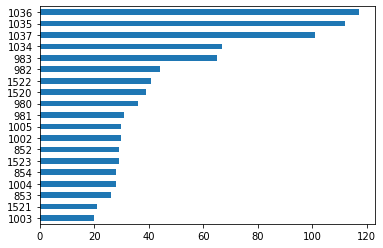

In [56]:
#Gráfico com barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

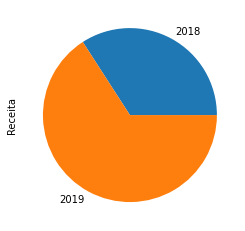

In [62]:
#Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [64]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total vendas')

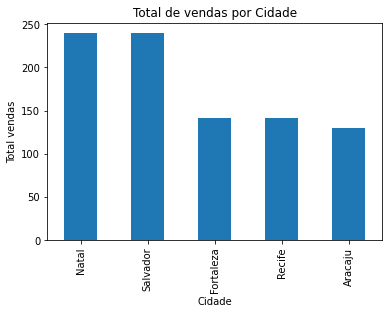

In [66]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por Cidade')

plt.xlabel('Cidade')
plt.ylabel('Total vendas')

Text(0, 0.5, 'Total vendas')

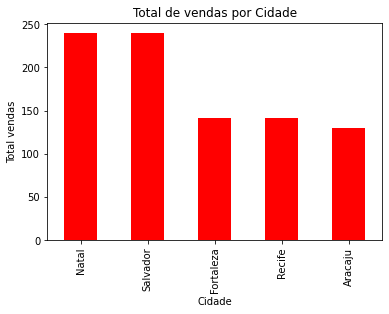

In [75]:
#Alterando a cor 
df['Cidade'].value_counts().plot.bar(title='Total de vendas por Cidade', color='red')

plt.xlabel('Cidade')
plt.ylabel('Total vendas')

In [86]:
#Alterando o estilo
plt.style.use('ggplot')

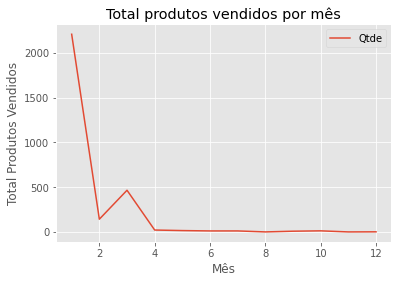

In [91]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()

In [93]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [95]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]

KeyError: ignored

In [98]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marquer = 'v')
plot.xlabel('Mês')
plot.ylabel('Total Produtos Vendidos');
plot.legend()

NameError: ignored

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

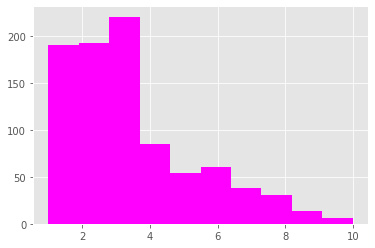

In [100]:
#Hisograma
plt.hist(df['Qtde'], color='magenta')

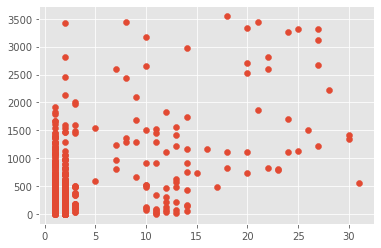

In [103]:
plt.scatter(x=df['dia_venda'], y = df['Receita']);

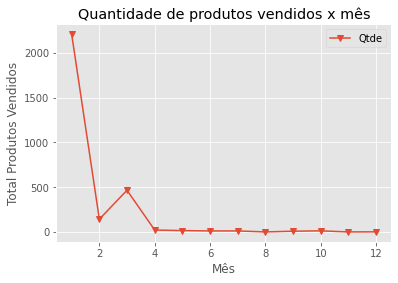

In [104]:
#Salvando em PNG
df.groupby(df['mes_venda'])['Qtde'].sum().plot(marker = "v")
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('grafico_QTDExMES.png')